In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("./usa_housing.csv");
df.shape

(5000, 7)

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
df.drop("Address", axis=1).corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


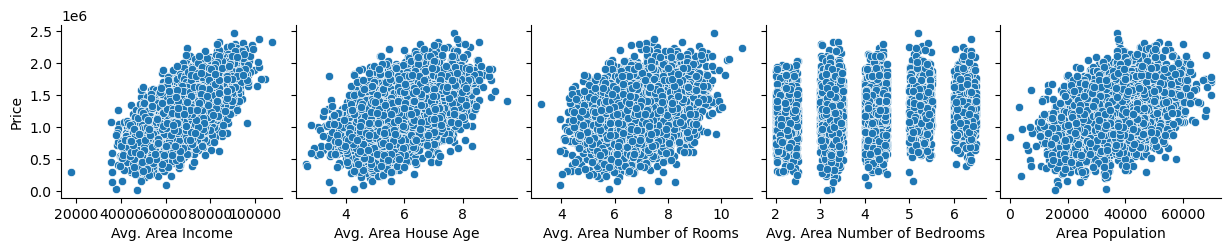

In [7]:
sns.pairplot(df, y_vars=["Price"], x_vars=["Avg. Area Income", "Avg. Area House Age",
                                           "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms",
                                           "Area Population"])
plt.show()

In [8]:
x = df.drop(["Address", "Price", "Avg. Area Number of Bedrooms"], axis=1)
y = df["Price"]

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_data)

                     feature        VIF
0           Avg. Area Income  29.632060
1        Avg. Area House Age  27.446757
2  Avg. Area Number of Rooms  32.156187
3            Area Population  12.813187


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
# Models

## Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

## Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [13]:
# Cross-validation
lr_cv_score = cross_val_score(lr_model, x, y, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression CV MSE:", -lr_cv_score.mean())

rf_cv_score = cross_val_score(rf_model, x, y, cv=5, scoring='neg_mean_squared_error')
print("Random Forest CV MSE:", -rf_cv_score.mean())

dt_cv_score = cross_val_score(dt_model, x, y, cv=5, scoring='neg_mean_squared_error')
print("Decision Tree CV MSE:", -dt_cv_score.mean())

Linear Regression CV MSE: 10251049036.942114
Random Forest CV MSE: 14426835506.820383
Decision Tree CV MSE: 42501038051.35311


In [14]:
main_model = lr_model # linear
# main_model = rf_model # random forest
# main_model = dt_model # decision tree

y_pred = main_model.predict(x_test)

lr_y_pred = lr_model.predict(x_test)
rf_y_pred = rf_model.predict(x_test)
dt_y_pred = dt_model.predict(x_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from math import sqrt

def calculate_metrics(model_name, y_test, y_pred, model, x_test):
    return {
        "Model": model_name,
        "MAE": round(mean_absolute_error(y_test, y_pred), 2),
        "MSE": round(mean_squared_error(y_test, y_pred), 2),
        "RMSE": round(sqrt(mean_squared_error(y_test, y_pred)), 2),
        "Explained Variance": round(explained_variance_score(y_test, y_pred), 2),
        "R2 Score": round(r2_score(y_test, y_pred), 2),
        "Score": round(model.score(x_test, y_test), 2),
    }

results = []
results.append(calculate_metrics("Linear Regression", y_test, lr_y_pred, lr_model, x_test))
results.append(calculate_metrics("Random Forest", y_test, rf_y_pred, rf_model, x_test))
results.append(calculate_metrics("Decision Tree", y_test, dt_y_pred, dt_model, x_test))

results_df = pd.DataFrame(results)

print(results_df)


               Model        MAE           MSE       RMSE  Explained Variance  \
0  Linear Regression   81116.43  1.006209e+10  100309.98                0.91   
1      Random Forest   93573.91  1.395432e+10  118128.42                0.88   
2      Decision Tree  165670.81  4.292610e+10  207186.15                0.64   

   R2 Score  Score  
0      0.91   0.91  
1      0.88   0.88  
2      0.64   0.64  


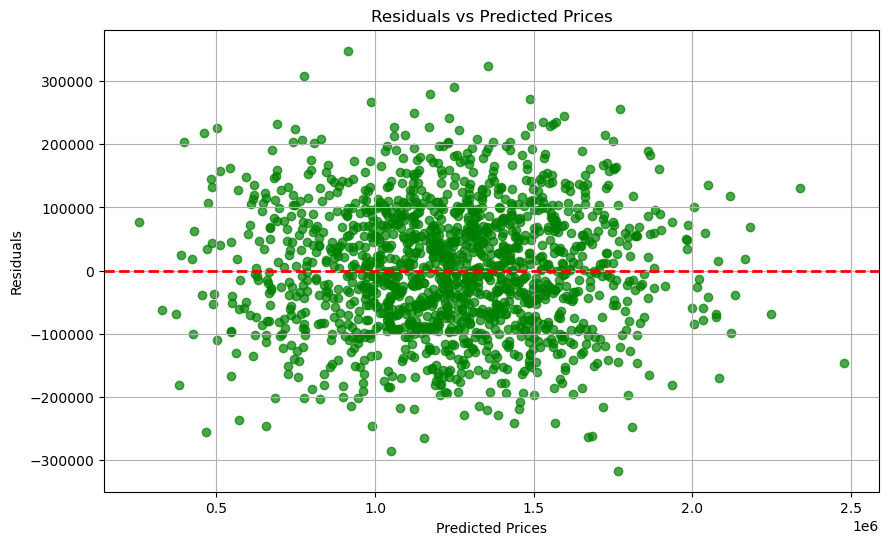

In [16]:
# Residual plot (testing bias)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

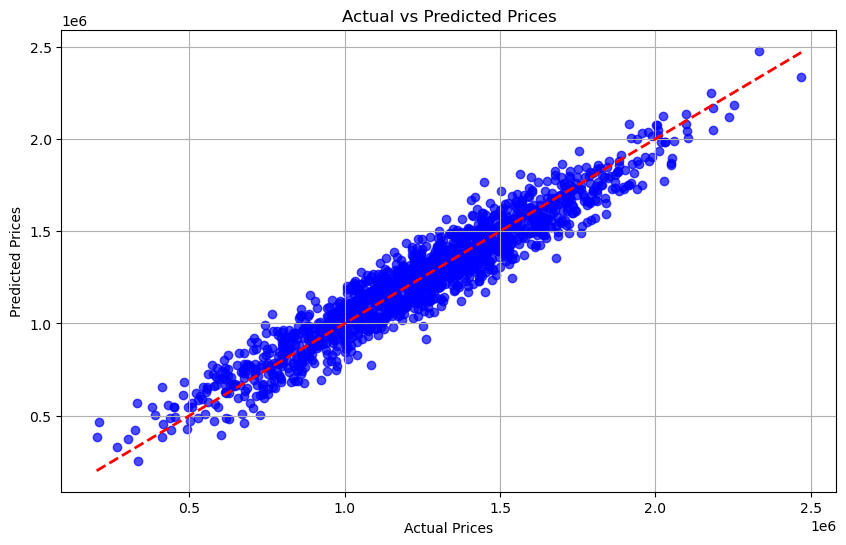

In [17]:
# Scatter plot for Actual vs. Predicted (testing accuracy)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # Reference line
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


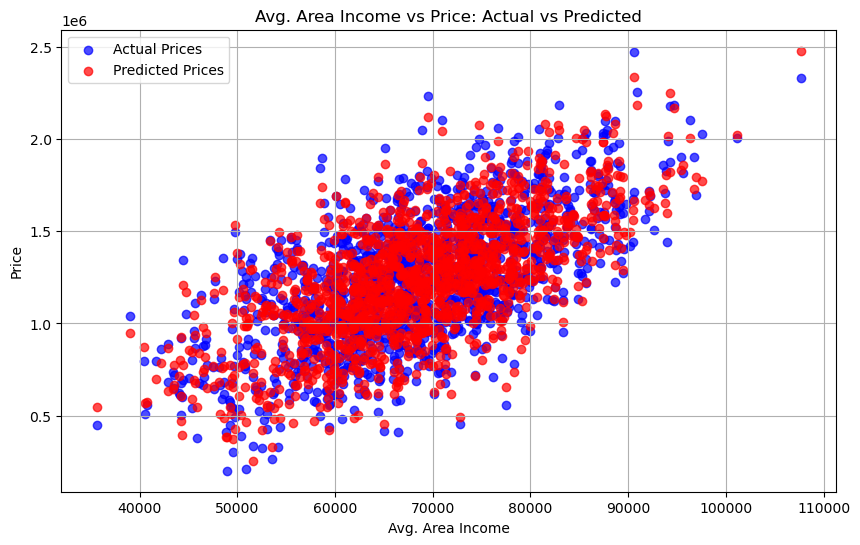

In [18]:
independent_var = x_test["Avg. Area Income"]
independent_var_name = "Avg. Area Income"

plt.figure(figsize=(10, 6))
# Scatter plot of Actual Prices
plt.scatter(independent_var, y_test, alpha=0.7, color='blue', label='Actual Prices')
# Scatter plot of Predicted Prices
plt.scatter(independent_var, y_pred, alpha=0.7, color='red', label='Predicted Prices')
plt.title(f'{independent_var_name} vs Price: Actual vs Predicted')
plt.xlabel(independent_var_name)
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

target = 'Price'
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms', 'Area Population']

results = []

for feature in features:
    x = df[feature].values.reshape(-1, 1)
    y = df[target].values
    
    r_value, p_value = pearsonr(df[feature].values, df[target].values)
    
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    r_squared = r2_score(y, y_pred)
    
    results.append({
        'Feature': feature,
        'P-Value': p_value,
        'R-Value': r_value,
        'R²': r_squared
    })

results_df = pd.DataFrame(results)
print(results_df)


                        Feature        P-Value   R-Value        R²
0              Avg. Area Income   0.000000e+00  0.639734  0.409259
1           Avg. Area House Age  4.944750e-251  0.452543  0.204795
2     Avg. Area Number of Rooms  6.165893e-132  0.335664  0.112671
3  Avg. Area Number of Bedrooms   3.808885e-34  0.171071  0.029265
4               Area Population  1.736392e-200  0.408556  0.166918
